In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
# Files to load

city_data_to_load = os.path.abspath("Resources/city_data.csv")
ride_data_to_load = os.path.abspath("Resources/ride_data.csv")



In [3]:
## Create a PyBer Summary DataFrame
# Combine the data into a single dataset

ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df = pd.read_csv(city_data_to_load)

pyber_data_df = pd.merge(ride_data_df, city_data_df, on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [4]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban


In [5]:
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [6]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]


In [7]:
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [8]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()


city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [9]:
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


In [10]:
# Total Number of Urban Drivers
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


In [11]:
# Get the average number of drivers for each urban city.
Total_Rides = pyber_data_df.groupby(["type"]).count()["city"]

urban_driver_sum = urban_driver_count.sum()
rural_driver_sum= rural_driver_count.sum()
suburban_driver_sum = suburban_driver_count.sum()

TotalDriverDF = pd.DataFrame({"type": ["Rural", "Suburban", "Urban"], "Total Drivers":[rural_driver_sum,suburban_driver_sum,urban_driver_sum]})
TotalDriverDF = TotalDriverDF.set_index(["type"])["Total Drivers"]

Total_Fares = pyber_data_df.groupby(["type"]).sum()["fare"] 
Avg_PerRide = pyber_data_df.groupby(["type"]).mean()["fare"]
Avg_FarePerDriver = Total_Fares/TotalDriverDF



In [12]:
#To create the summary DataFrame, follow these steps:

#Get the total rides, total drivers, and total fares for each city type using the groupby() function on the city type using the merged DataFrame or separate DataFrames.
#Calculate the average fare per ride and the average fare per driver by city type.
#Delete the index name.
#Create the summary DataFrame with the appropriate columns and apply formatting where appropriate.


SummaryDF = pd.DataFrame({"Total Rides": Total_Rides, "Total Drivers":TotalDriverDF,  "Total Fares": Total_Fares,
                       "Average Fare per ride":Avg_PerRide, "Average Per Driver": Avg_FarePerDriver})

SummaryDF.index.name = None

SummaryDF["Total Fares"] = SummaryDF["Total Fares"].map("${:.2f}".format)
SummaryDF["Average Fare per ride"] = SummaryDF["Average Fare per ride"].map("${:.2f}".format)
SummaryDF["Total Drivers"] = SummaryDF["Total Drivers"].map("{:.0f}".format)
SummaryDF["Average Per Driver"] = SummaryDF["Average Per Driver"].map("${:.2f}".format)
SummaryDF["Total Rides"] = SummaryDF["Total Rides"].map("{:,}".format)



In [13]:
## Rename columns

pyber_data_df.rename(columns={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'}, inplace=True)

pyber_data_df


,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [14]:
## Set the index to the Date column
# Reorder the columns in the order you want them to appear.
new_column_order = ['Date', 'City', 'Fare', 'Ride Id','No. Drivers', 'City Type']

pyber_data_df = pyber_data_df[new_column_order]

pyber_data_df

,Date,City,Fare,Ride Id,No. Drivers,City Type
0,2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
1,2019-04-07 20:51:11,Lake Jonathanshire,31.25,4441251834598,5,Urban
2,2019-03-09 23:45:55,Lake Jonathanshire,19.89,2389495660448,5,Urban
3,2019-04-07 18:09:21,Lake Jonathanshire,24.28,7796805191168,5,Urban
4,2019-01-02 14:14:50,Lake Jonathanshire,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,2019-04-18 19:33:12,West Heather,46.60,3671003215967,4,Rural
2371,2019-03-02 21:04:10,West Heather,20.99,5766454453070,4,Rural
2372,2019-03-06 20:06:51,West Heather,48.11,2570548892682,4,Rural
2373,2019-02-02 06:28:04,West Heather,53.07,2462950442268,4,Rural


In [15]:
# Create a new DataFrame for fares and include only the 
##Date, City Type, and Fare columns using the copy() method on the merged DataFrame
new_pyber_data_df  = pyber_data_df[["Date", "City", "Fare", "City Type"]].copy()


In [16]:
new_pyber_data_df.set_index("Date")

DateTypes = new_pyber_data_df["Date"].tolist()

Date_fixed = []

for name in DateTypes:
    if len(name.split()) >= 1:
        Date_fixed.append(name.split()[0])

new_pyber_data_df["Date"] =  Date_fixed


In [17]:
new_pyber_data_df.head()


,Date,City,Fare,City Type
0,2019-01-14,Lake Jonathanshire,13.83,Urban
1,2019-04-07,Lake Jonathanshire,31.25,Urban
2,2019-03-09,Lake Jonathanshire,19.89,Urban
3,2019-04-07,Lake Jonathanshire,24.28,Urban
4,2019-01-02,Lake Jonathanshire,13.89,Urban


In [18]:
# 7. Calculate the sum() of fares by the type of city and date using groupby() to create a new DataFrame.
FaresDF = new_pyber_data_df.groupby(["City Type", "Date"]).sum()["Fare"]
FaresDF = FaresDF.to_frame()

FaresDF


Fare
City Type Date              
Rural     2019-01-01   43.69
          2019-01-02   52.12
          2019-01-03   19.90
          2019-01-04   24.88
          2019-01-06   47.33
...                      ...
Urban     2019-05-04  323.57
          2019-05-05  322.10
          2019-05-06  181.20
          2019-05-07  258.01
          2019-05-08  170.82

[334 rows x 1 columns]

In [19]:
## 8. Reset the index, which is needed for Step 10.
FaresDF.reset_index(inplace = True) 
FaresDF


,City Type,Date,Fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33
...,...,...,...
329,Urban,2019-05-04,323.57
330,Urban,2019-05-05,322.10
331,Urban,2019-05-06,181.20
332,Urban,2019-05-07,258.01


In [20]:
#from datetime import datetime 

#FaresDF['Date'] = pd.to_datetime(FaresDF['Date']).dt.date

FaresDF

#FaresDF.index.name = "Date"
#FaresDF

,City Type,Date,Fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33
...,...,...,...
329,Urban,2019-05-04,323.57
330,Urban,2019-05-05,322.10
331,Urban,2019-05-06,181.20
332,Urban,2019-05-07,258.01


In [21]:
## 
## 9. Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row

import numpy as np
import scipy.stats as sts

FarePVTable = pd.pivot_table(FaresDF, values='Fare', index=['Date'], columns=['City Type'], aggfunc=np.sum)
FarePVTable


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [22]:
## 10. Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc .

FarePVTableDF =  FarePVTable.reset_index()
FarePVTableDFTrial = FarePVTableDF.set_index("Date")
FarePVTableDF =  FarePVTableDFTrial.loc['2019-01-01':'2019-04-28']
FarePVTableDF


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-24,NaN,220.72,312.64
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98


In [23]:
from datetime import datetime 
FaresDFDate = FarePVTableDF.copy()
FaresDFDate = FaresDFDate.reset_index()
FaresDFDate["Date"] = pd.to_datetime(FaresDFDate["Date"])
FaresDFDate = FaresDFDate.reset_index(drop=True)
FaresDFDate = FaresDFDate.set_index(["Date"])
FaresDFDate


City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-24,NaN,220.72,312.64
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98


In [24]:
## 11. Create a new DataFrame by setting the DataFrame you created in Step 11 
##     with resample() in weekly bins, and calculate the sum() of the fares for each week.

TotalFaresWeekly = FaresDFDate.resample("W").sum()
TotalFaresWeekly



City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


C:\Users\esrampur\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


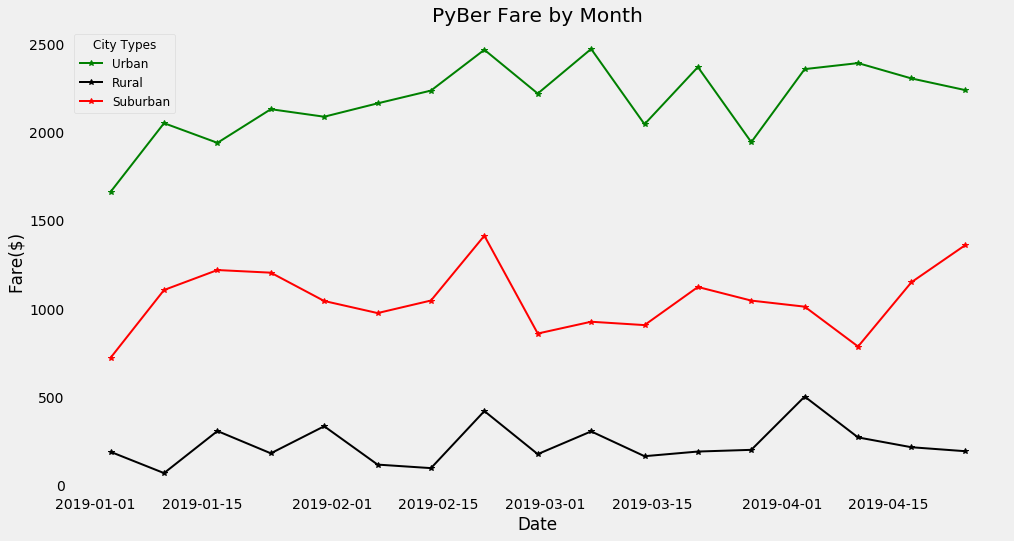

In [25]:
# Using the object-oriented interface method, plot the DataFrame you created in 
# Step 12 using the df.plot() function. Things to consider with your plotting:

import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,8))
plt.xlabel("Date")
plt.ylabel("Fare($)")

# Create a title. 
plt.title("PyBer Fare by Month")

plt.plot((TotalFaresWeekly.index.to_pydatetime()).astype('datetime64[W]'), TotalFaresWeekly["Urban"], marker="*", color="green", linewidth=2, label='Urban')
plt.plot((TotalFaresWeekly.index.to_pydatetime()).astype('datetime64[W]'), TotalFaresWeekly["Rural"], marker="*", color="black", linewidth=2, label='Rural')
plt.plot((TotalFaresWeekly.index.to_pydatetime()).astype('datetime64[W]'), TotalFaresWeekly["Suburban"], marker="*", color="red", linewidth=2, label='Suburban')

# Add a grid.
plt.grid()

#plt.xticks(RuralDateTrialType.index,Rotation="vertical")
# Add the legend.
# Create a legend

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


plt.savefig(os.path.abspath("analysis/module_challenge.png"))
